In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import sys
sys.path.insert(0, '/Users/mondormo/stackla17/deeplearning2019/deep-learning-v2-pytorch/intro-to-pytorch')

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [3]:
from torchvision import datasets, transforms

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)




In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [14]:
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


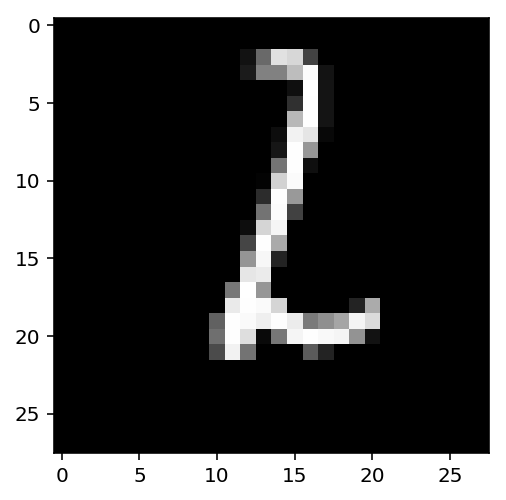

In [6]:
plt.imshow(images[1].numpy().squeeze(),  cmap='Greys_r')

In [7]:
def activate(x):
    return 1/(1+torch.exp(-x))

W1 = torch.randn((784, 256))
B1 = torch.randn((1, 256))
W2 = torch.randn((256, 10))
B2 = torch.randn((1, 10))

hidden_out = activate(images.view(images.shape[0], -1).mm(W1) + B1)
out = hidden_out.mm(W2) + B2


In [8]:
out.shape

torch.Size([64, 10])

In [9]:
torch.exp(out).shape

torch.Size([64, 10])

In [10]:
torch.sum(torch.exp(out), dim=1).shape

torch.Size([64])

In [11]:
torch.sum(torch.exp(out), dim=1).view(-1, 1).shape

torch.Size([64, 1])

In [12]:
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1,1)

In [13]:
probabilities = softmax(out)

In [14]:
probabilities.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

In [15]:
from torch import nn

In [43]:
class Network(nn.Module):
    def __init__(self, i_dim, h_dim, o_dim):
        super(Network, self).__init__()
        self.w1 = nn.Linear(i_dim, h_dim)
        self.s2 = nn.Linear(h_dim, o_dim)
        
i_dim = 5
h_dim = 2
o_dim = 3

model = Network(i_dim, h_dim, o_dim)
model
for param in model.parameters():
    print(type(param.data), param.size())

<class 'torch.Tensor'> torch.Size([2, 5])
<class 'torch.Tensor'> torch.Size([2])
<class 'torch.Tensor'> torch.Size([3, 2])
<class 'torch.Tensor'> torch.Size([3])


In [42]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x
    
model = Network()
model
        
        

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [43]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0238,  0.0206, -0.0030,  ..., -0.0065,  0.0049,  0.0194],
        [-0.0083, -0.0028,  0.0194,  ...,  0.0203,  0.0069, -0.0119],
        [-0.0149, -0.0018, -0.0113,  ..., -0.0155, -0.0025, -0.0203],
        ...,
        [-0.0106, -0.0120,  0.0034,  ..., -0.0325,  0.0242,  0.0306],
        [-0.0288,  0.0261,  0.0117,  ..., -0.0202, -0.0226, -0.0057],
        [-0.0079, -0.0337, -0.0181,  ..., -0.0156, -0.0078, -0.0099]],
       requires_grad=True)
Parameter containing:
tensor([-0.0165, -0.0216, -0.0045, -0.0246, -0.0308,  0.0241, -0.0017,  0.0245,
        -0.0130, -0.0291,  0.0243, -0.0239,  0.0076,  0.0083, -0.0082,  0.0208,
         0.0066,  0.0101,  0.0047, -0.0324,  0.0227, -0.0087,  0.0338, -0.0350,
         0.0006,  0.0290, -0.0357, -0.0316,  0.0204,  0.0022, -0.0181, -0.0252,
        -0.0238, -0.0308, -0.0209, -0.0190,  0.0223,  0.0225, -0.0272, -0.0214,
         0.0108,  0.0115, -0.0334,  0.0131,  0.0094, -0.0280,  0.0019, -0.0267,
        -0.0234

In [44]:
model.fc1.weight.data.fill_(0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [47]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0064, -0.0080,  0.0122,  ..., -0.0106, -0.0071, -0.0082],
        [ 0.0023, -0.0225,  0.0046,  ..., -0.0057, -0.0065,  0.0168],
        [ 0.0069,  0.0069, -0.0236,  ...,  0.0236,  0.0045, -0.0164],
        ...,
        [-0.0031, -0.0026,  0.0037,  ..., -0.0061,  0.0072,  0.0045],
        [-0.0091,  0.0005, -0.0027,  ...,  0.0034, -0.0011, -0.0043],
        [-0.0139, -0.0117,  0.0059,  ..., -0.0181, -0.0008,  0.0013]])

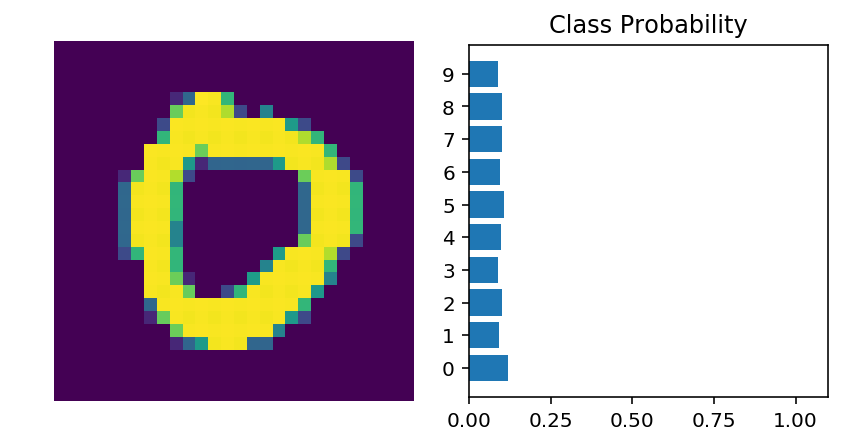

In [48]:
dataiter = iter(trainloader)

images, labels = dataiter.next()

images.resize_(images.shape[0], 1, 784)

img_idx = 0

ps = model.forward(images[img_idx, :])

img = images[img_idx]

helper.view_classify(img.view(1,28,28), ps)
                            
                            

In [54]:
input_size = 784
hidden_size_1 = 128
hidden_size_2 = 64
output_size = 10

model = nn.Sequential(
    nn.Linear(input_size, hidden_size_1),
    nn.ReLU(),
    nn.Linear(hidden_size_1, hidden_size_2),
    nn.ReLU(),
    nn.Linear(hidden_size_2, output_size),
    nn.Softmax(dim=1)
)

print(model)



Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)
